# 감성분석 예제  2: 영화 감상평  예제

### 5개의 Label : 5단계 분석
- 0 : '부정적'
- 1 : '약간 부정적'
- 2 : '중립적'
- 3 : '약간 긍정적'
- 4 : '긍정적'

In [1]:
# Colab : 구글 드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# import os

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

from tqdm import tqdm

In [4]:
from tensorflow.keras.utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Bidirectional

tf.random.set_seed(123)

random.seed(123)

### 데이터 가져오기

In [6]:
train = pd.read_csv('train.tsv',sep='\t')
print(train.shape)  # (156060, 4)
train

(156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


### 텍스트 전처리

In [7]:
def clean_sentences(df):
    reviews = []
    
    for sent in tqdm(df['Phrase']):
        # remove html content
        # review_text = BeautifulSoup(sent).get_text()
        
        review_text = re.sub('[^a-zA-Z]', ' ',sent)  # 영문자이외에는 공백으로 변경
        
        words = word_tokenize(review_text.lower())   # 토큰화
        
        lemma_words = [lemmatizer.lemmatize(i) for i in words]  # 표제어 : 원형
        
        reviews.append(lemma_words)
        
    return reviews

In [8]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IPA(백찬휘)\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IPA(백찬휘)\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# 전처리 코드 실행
train_sentences = clean_sentences(train)
print(len(train_sentences))

100%|████████████████████████████████████████████████████████████████████████| 156060/156060 [00:49<00:00, 3154.75it/s]

156060


In [11]:
# train_sentences[0]

In [14]:
target = train.Sentiment.values
print(target, target.shape)        # (156060,)
y_target = to_categorical(target)  # one-hot 벡터로 변환
print(y_target, y_target.shape)    # Y: (156060, 5)
num_classes = y_target.shape[1]    # 5
print(num_classes)

[1 2 2 ... 3 2 2] (156060,)
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]] (156060, 5)
5


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


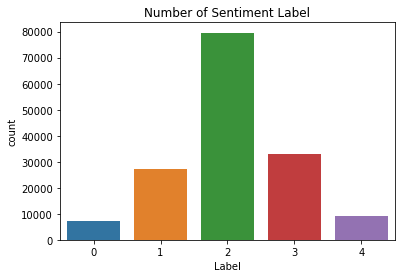

In [15]:
# Y 레이블의 분포
print(train['Sentiment'].value_counts())
sns.countplot(train['Sentiment'])
plt.xlabel('Label')
plt.title('Number of Sentiment Label')
plt.show()